In [100]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [101]:
import pandas as pd
import numpy as np

In [102]:
import matplotlib.pyplot as plt

**Importing the dataset**

In [103]:
df = pd.read_csv('Social_Network_Ads.csv')

In [104]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [105]:
df.shape

(400, 5)

In [106]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [107]:
df.drop(columns = ['User ID'],inplace = True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [108]:
df['Gender']= df['Gender'].map({'Male':1,'Female': 2})
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,2,46,41000,1
396,1,51,23000,1
397,2,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [109]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Purchased'],axis = 1).values
y = df['Purchased'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 10)

**Feature Scaling**

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in range(1,15):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  print('K_value: ', i ,'train score:', knn.score(X_train,y_train) , 'Cross_val_score:',np.mean(cross_val_score(knn, X_train, y_train,cv = 10)))

K_value:  1 train score: 0.9966666666666667 Cross_val_score: 0.8533333333333335
K_value:  2 train score: 0.9333333333333333 Cross_val_score: 0.8366666666666667
K_value:  3 train score: 0.93 Cross_val_score: 0.8733333333333334
K_value:  4 train score: 0.9166666666666666 Cross_val_score: 0.8666666666666666
K_value:  5 train score: 0.9233333333333333 Cross_val_score: 0.9033333333333333
K_value:  6 train score: 0.9133333333333333 Cross_val_score: 0.9033333333333333
K_value:  7 train score: 0.9133333333333333 Cross_val_score: 0.9066666666666666
K_value:  8 train score: 0.91 Cross_val_score: 0.9033333333333333
K_value:  9 train score: 0.9066666666666666 Cross_val_score: 0.9033333333333333
K_value:  10 train score: 0.9033333333333333 Cross_val_score: 0.9
K_value:  11 train score: 0.91 Cross_val_score: 0.9033333333333333
K_value:  12 train score: 0.9066666666666666 Cross_val_score: 0.9
K_value:  13 train score: 0.9066666666666666 Cross_val_score: 0.9
K_value:  14 train score: 0.903333333333333

K=7 is the best k value according to the highest cross val score of 0.9066666666666666.


**Predicting the Test set results**

In [112]:
y_pred = knn.predict(X_test)
y_pred 

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0])

**Making the Confusion Matrix**

In [113]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix


array([[65,  4],
       [ 3, 28]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


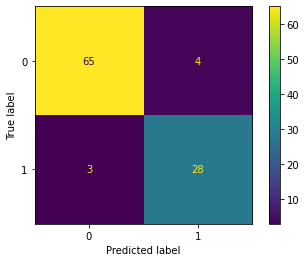

In [116]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_test)